# Fundamentals of  Data Analysis - ASSIGNMENT

## 1.  Anscombe’s quartet dataset

Summary statistics allow us to describe a vast, complex dataset using just a few key numbers. But there’s a danger in relying only on summary statistics and ignoring the overall distribution. Perhaps the most elegant demonstration of the dangers of summary statistics is Anscombe’s Quartet.
<br>
Anscombe's quartet comprises four datasets that have nearly identical simple descriptive statistics, yet appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers on statistical properties. He described the article as being intended to counter the impression among statisticians that "numerical calculations are exact, but graphs are rough."
<br>


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the dataset
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


## 2.  Some interesting aspects of the dataset

All four sets are almost identical when examined using simple summary statistics, like SUM, AVERAGE and STANDARD DEVIATION, but vary considerably when graphed:

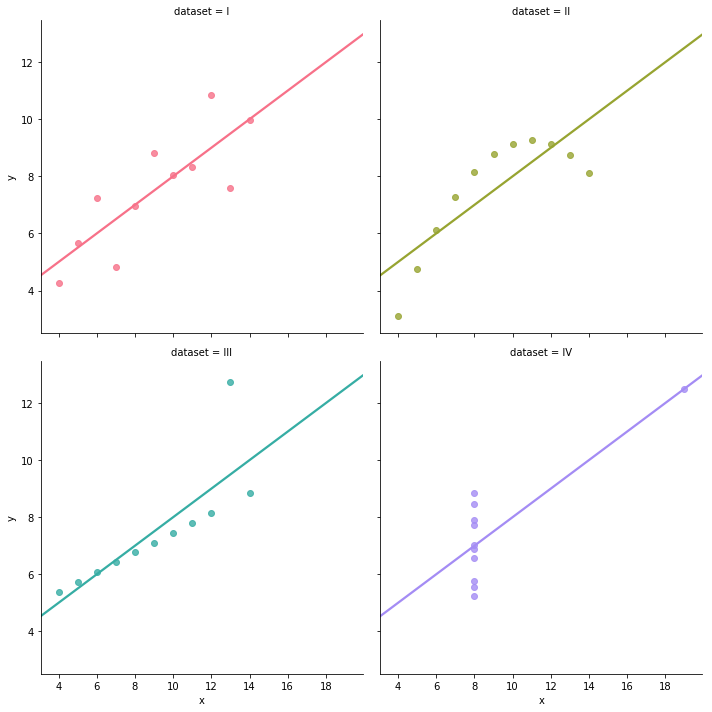

In [4]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="husl")

## 3.  Some descriptive statistics of the variables in the dataset

In [7]:
data = df.groupby('dataset')
data.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

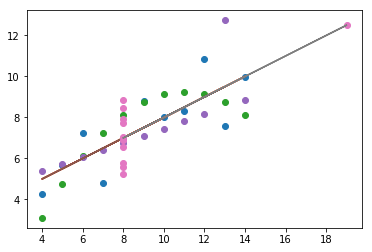

In [27]:
# Plotting linear regression for all 4 datasets:
k = 0
df_d = [1,1,1,1]
trend = [1,1,1,1]
for i in ["I", "II", "III", "IV"]:
    df_d[k] = df[df['dataset'] == i]
    trend[k] = np.polyfit(df_d[k]['x'], df_d[k]['y'], 1)
    plt.plot(df_d[k]['x'],df_d[k]['y'],'o')
    plt.plot(df_d[k]['x'],trend[k][1]+trend[k][0]*df_d[k]['x'])
    k = k + 1

In [28]:
# Correlation between x and y:
data = df.groupby('dataset').corr()
data

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

## 4.  Dataset discussion

## References


[1] https://en.wikipedia.org/wiki/Anscombe%27s_quartet
<br>
[2] http://data.princeton.edu/wws509/stata/anscombe.html
<br>
[3] https://heapanalytics.com/blog/data-stories/anscombes-quartet-and-why-summary-statistics-dont-tell-the-whole-story
<br>
[4] https://seaborn.pydata.org/examples/anscombes_quartet.html
<br>
[5] https://businessq-software.com/2016/04/19/power-data-visualization-anscombes-story/